<a href="https://colab.research.google.com/github/Hamrita/MQ/blob/main/Regression_with_R_and_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression linéaire avec R et Python

Ce document montre la réalisation d'une régression linéaire sous R et Python.

**Remarque :** On peut travailler avec R et Python simultanément dans une notebook de google colab ou dans RStudio (on doit installer et charger la bibliothèque `reticulate`. voir [ce lien](https://fastercapital.com/fr/contenu/Integration-R-et-Python---combiner-le-meilleur-des-deux-mondes.html#:~:text=L'int%C3%A9gration%20de%20R%20et%20Python%20peut%20se%20faire%20de,du%20code%20R%20depuis%20Python.)

Tout au long de ce document, on va travailler avec la base de données extraite du livre: Econométrie (Régis Bourbonnais (2021) - C3EX1)

 ## Chargement de la base de données

In [1]:
# Python
import pandas as pd
pth='https://raw.githubusercontent.com/Hamrita/MQ/main/Data/C3EX1.csv'
data=pd.read_csv(pth, sep=";")
data.head(4) # montrer les 4 premières lines

,Y,X1,X2,X3
0,12,2,45,121
1,14,1,43,132
2,10,3,43,154
3,16,6,47,145


In [42]:
data.tail(3) # les trois dernières lines

,Y,X1,X2,X3
11,21,9,31,172
12,25,12,35,174
13,21,7,29,180


In [3]:
# R
%load_ext rpy2.ipython

In [4]:
%%R
pth='https://raw.githubusercontent.com/Hamrita/MQ/main/Data/C3EX1.csv'
data=read.csv(pth, h=T, sep=";")
head(data,4) # afficher les 4 premières lignes


   Y X1 X2  X3
1 12  2 45 121
2 14  1 43 132
3 10  3 43 154
4 16  6 47 145


In [5]:
%%R
tail(data,3) # afficher les 3 dernières lignes

    Y X1 X2  X3
12 21  9 31 172
13 25 12 35 174
14 21  7 29 180


## Régression

On va regresser la variable `y` sur les variables `X1` , `X2` et `X3` sous `R`.
$$
y_i=\beta_0+\beta_1 X_{1i} +\beta_2 X_{2i}+\beta_3 X_{3i} +\varepsilon_i
$$

In [34]:
%%R
reg=lm(Y~., data)
s_reg=summary(reg)
s_reg


Call:
lm(formula = Y ~ ., data = data)

Residuals:
            Min              1Q          Median              3Q             Max 
-3.697325575842 -1.125944003527  0.190658141206  1.484626214763  4.487980999731 

Coefficients:
                    Estimate       Std. Error  t value Pr(>|t|)  
(Intercept) 32.8913242817904 11.6633101469770  2.82007 0.018159 *
X1           0.8019006878308  0.2984358398065  2.68701 0.022816 *
X2          -0.3813623642599  0.1565806891334 -2.43556 0.035114 *
X3          -0.0371324358283  0.0520231248220 -0.71377 0.491694  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.59706884835 on 10 degrees of freedom
Multiple R-squared:  0.702686610696,	Adjusted R-squared:  0.613492593905 
F-statistic: 7.87818102576 on 3 and 10 DF,  p-value: 0.00545230466011



In [33]:
%%R
s_reg$coeff

                       Estimate          Std. Error            t value
(Intercept) 32.8913242817904177 11.6633101469770502  2.820067705248783
X1           0.8019006878307692  0.2984358398064694  2.687012016890425
X2          -0.3813623642598767  0.1565806891333754 -2.435564477143362
X3          -0.0371324358282841  0.0520231248219555 -0.713767886019275
                      Pr(>|t|)
(Intercept) 0.0181585984398871
X1          0.0228164279633059
X2          0.0351143987552569
X3          0.4916935503311782


In [41]:
# Intervalle de confiance des coefficients
%%R
confint(reg)

                         2.5 %              97.5 %
(Intercept)  6.903849800545114 58.8787987630357179
X1           0.136944198332823  1.4668571773287153
X2          -0.730245881188735 -0.0324788473310181
X3          -0.153047181445815  0.0787823097892465


In [42]:
# La matrice des variances-covariances des coeff
%%R
vcov(reg)

                    (Intercept)                   X1                   X2
(Intercept) 136.032803584577834  0.10161438581445975 -1.56107767728484248
X1            0.101614385814460  0.08906395048099267  0.00805595967350293
X2           -1.561077677284842  0.00805595967350293  0.02451751220948274
X3           -0.513781462301677 -0.00634135995157134  0.00388109570883249
                              X3
(Intercept) -0.51378146230167687
X1          -0.00634135995157134
X2           0.00388109570883249
X3           0.00270640551624076


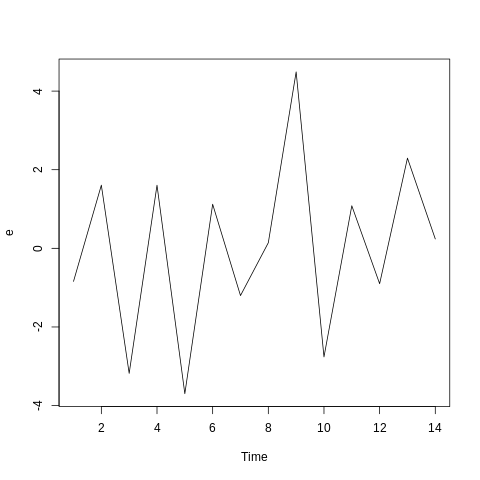

In [47]:
# les résidus
%%R
e=resid(reg)
plot.ts(e)

In [50]:
# vérifions que la somme des erreurs est égale à 0
%%R
round(sum(e),14) # arrondissement à 14 chiffres aprés la virgule

[1] 0


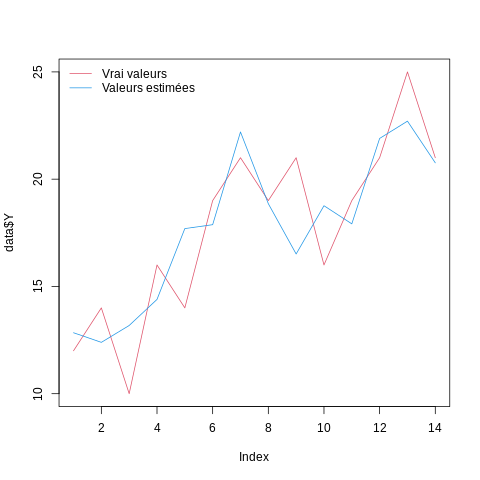

In [62]:
# les valeurs de y_chapeau
%%R
y_chapeau=reg$fitted
plot(data$Y, type="l", col=2)
lines(y_chapeau, col=4)
legend("topleft", col=c(2,4), lty=1, bty="n",
       legend=c("Vrai valeurs", "Valeurs estimées"))

In [35]:
# le tableau d'anova
%%R
summary(aov(reg))

            Df         Sum Sq        Mean Sq  F value    Pr(>F)   
X1           1 117.6588830685 117.6588830685 17.44447 0.0018978 **
X2           1  38.3143739714  38.3143739714  5.68061 0.0383887 * 
X3           1   3.4362197866   3.4362197866  0.50946 0.4916936   
Residuals   10  67.4476660307   6.7447666031                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Voyons maintenant la régression avec python. On peut faire la régression linéaire sous python soit à l'aide du module `statmodels` soit à l'aide du module `scikit-learn`

In [43]:
# avec statmodels
import numpy as np
import statsmodels.api as sm
np_data=np.array(data)
X, y =sm.add_constant(np_data[:,1:]), np_data[:,0]
reg=sm.OLS(y,X).fit()
s_reg=reg.summary()
print(s_reg)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7.878
Date:                Fri, 05 Apr 2024   Prob (F-statistic):            0.00545
Time:                        02:22:26   Log-Likelihood:                -30.871
No. Observations:                  14   AIC:                             69.74
Df Residuals:                      10   BIC:                             72.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8913     11.663      2.820      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [44]:
import statsmodels.formula.api as sf
lm1=sf.ols("y ~X1 + X2 + X3", data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7.878
Date:                Fri, 05 Apr 2024   Prob (F-statistic):            0.00545
Time:                        02:22:35   Log-Likelihood:                -30.871
No. Observations:                  14   AIC:                             69.74
Df Residuals:                      10   BIC:                             72.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8913     11.663      2.820      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [70]:
# avec sklearn
from sklearn.linear_model import LinearRegression
X=np_data[:,1:]
model=LinearRegression()
reg_sk=model.fit(X,y)
print(model.intercept_, model.coef_, model.score(X,y) )

32.89132428179042 [ 0.80190069 -0.38136236 -0.03713244] 0.7026866106958688


In [45]:
# matrice des var-cov
lm1.cov_params()

,Intercept,X1,X2,X3
Intercept,136.032804,0.101614,-1.561078,-0.513781
X1,0.101614,0.089064,0.008056,-0.006341
X2,-1.561078,0.008056,0.024518,0.003881
X3,-0.513781,-0.006341,0.003881,0.002706


In [56]:
ee=lm1.resid
round(ee.sum(),12)

0.0

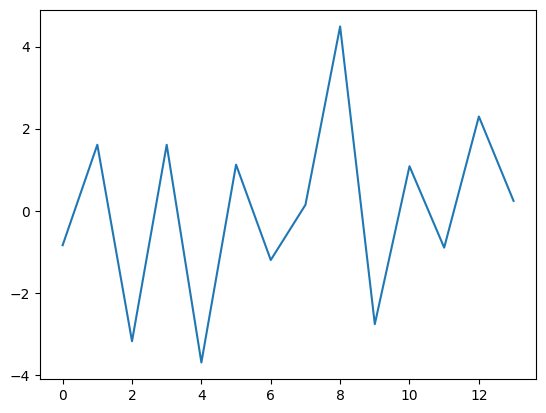

In [58]:
import matplotlib.pyplot as plt
plt.plot(ee)
plt.show()

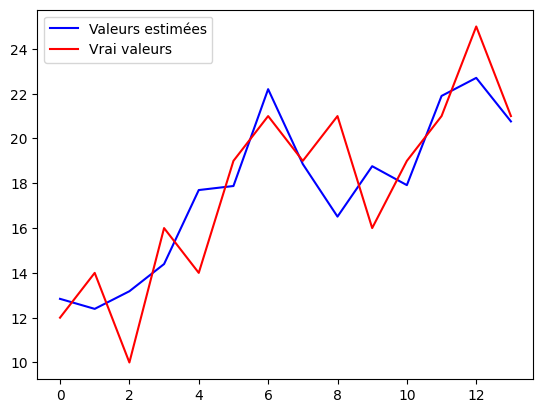

In [69]:
y_hat=lm1.fittedvalues
plt.plot(y_hat,"b", label="Valeurs estimées")
plt.plot(data["Y"],"r", label="Vrai valeurs")
plt.legend(loc='upper left')
plt.show()

In [11]:
# anova
aov=sm.stats.anova_lm(lm1, test="F", type="I")
print(aov)

            df      sum_sq     mean_sq          F    PR(>F)
X1         1.0  117.658883  117.658883  17.444471  0.001898
X2         1.0   38.314374   38.314374   5.680608  0.038389
X3         1.0    3.436220    3.436220   0.509465  0.491694
Residual  10.0   67.447666    6.744767        NaN       NaN


## Tests d'hypothèse

En premier lieu, on va tester si $H_0: \beta_1=1$.

Il est à noter que sous $H_0$, le modèle s'écrit comme suit:
$$
y_i=\beta_0+ X_{1i} + \beta_2 X_{2i}+\beta_3 X_{3i} +ɛ_i\\
⟺ y_i- X_{1i}= \beta_0+ \beta_2 X_{2i}+\beta_3 X_{3i} +ɛ_i
$$

In [71]:
# test beta_1=1 sous R
%%R
y_c=data$Y-data$X1
mod_c=lm(y_c ~ data$X2 + data$X3)
anova(reg,mod_c)

Analysis of Variance Table

Response: Y
          Df          Sum Sq         Mean Sq  F value    Pr(>F)   
X1         1 117.65888306845 117.65888306845 17.44447 0.0018978 **
X2         1  38.31437397142  38.31437397142  5.68061 0.0383887 * 
X3         1   3.43621978656   3.43621978656  0.50946 0.4916936   
Residuals 10  67.44766603071   6.74476660307                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
# sous R, on fait recours à la bibliothèque car
%%R
install.packages("car")
library("car")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpCGvlWe/downloaded_packages’



In [72]:
%%R
# test 1: beta_1=1
test1=linearHypothesis(reg, c("X1=1"))
test1

Linear hypothesis test

Hypothesis:
X1 = 1

Model 1: restricted model
Model 2: Y ~ X1 + X2 + X3

  Res.Df            RSS Df      Sum of Sq       F  Pr(>F)
1     11 70.41954354806                                  
2     10 67.44766603071  1 2.971877517353 0.44062 0.52183


In [23]:
# test beta_1=1
test='(X1=1)'
print(lm1.f_test(test))

<F test: F=0.4406197711867431, p=0.5218324557660143, df_denom=10, df_num=1>


## Tester une combinaison linéaire sur les paramètres:

Supposons qu'on veut tester: $\beta_1=2\beta_2$, ceci équivaut à $\beta_1-2\beta_2=0$

In [36]:
%%R
# test: beta_1-2*beta_2=0
linearHypothesis(reg, c('X1-2*X2=0'))

Linear hypothesis test

Hypothesis:
X1 - 2 X2 = 0

Model 1: restricted model
Model 2: Y ~ X1 + X2 + X3

  Res.Df             RSS Df      Sum of Sq        F    Pr(>F)   
1     11 174.03553594835                                        
2     10  67.44766603071  1 106.5878699176 15.80305 0.0026208 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [40]:
test2='(X1=2*X2)'
print(lm1.f_test(test2))

<F test: F=15.80304793187568, p=0.0026207730502854753, df_denom=10, df_num=1>


## Tester plusieurs restrictions

Supposons qu'on veut tester: $\beta_1=1$ et $\beta_2+\beta_3=-0.5$.

In [73]:
## Tester plusieurs restrictions
%%R
linearHypothesis(reg,c("X1=1","X2+X3=-0.5"))

Linear hypothesis test

Hypothesis:
X1 = 1
X2  + X3 = - 0.5

Model 1: restricted model
Model 2: Y ~ X1 + X2 + X3

  Res.Df            RSS Df      Sum of Sq       F  Pr(>F)
1     12 71.82420434996                                  
2     10 67.44766603071  2 4.376538319255 0.32444 0.73027


In [74]:
test3='(X1=1), (X2+X3=-0.5)'
print(lm1.f_test(test3))

<F test: F=0.32443956750570707, p=0.7302650413295917, df_denom=10, df_num=2>
